# 4. Java, Kotlin - Kolekcje

![obraz.png](attachment:69511923-e046-4a66-8ff8-08feca9cb913.png "Kolekcje Java")

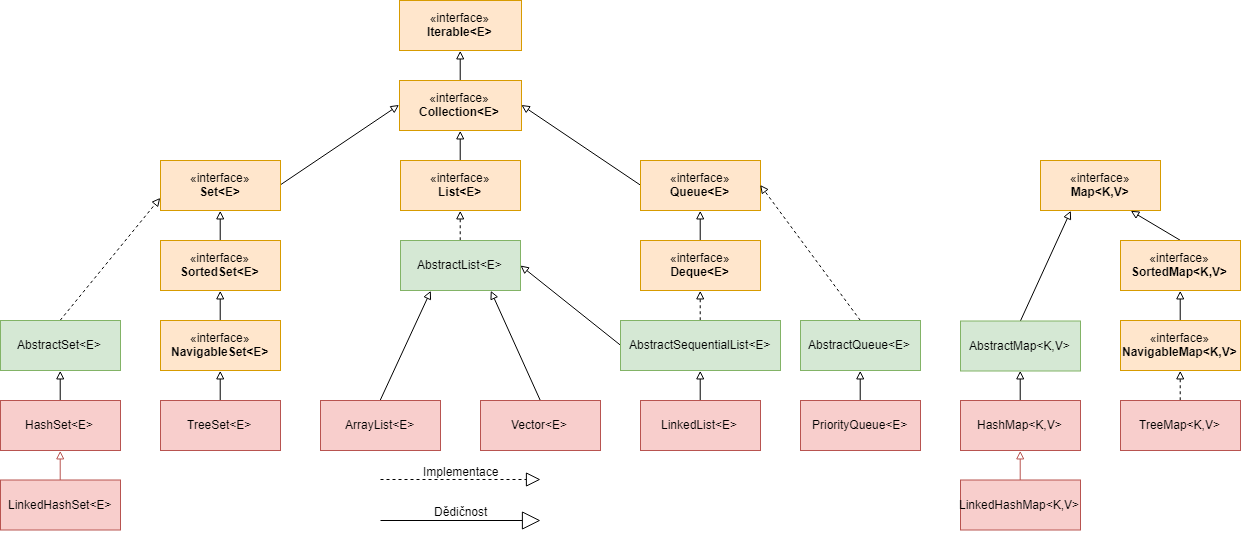

![alt text for screen readers](https://csharpcorner-mindcrackerinc.netdna-ssl.com/article/using-collection-in-kotlin/Images/image001.png "Kolekcje Kotlin") 

## 4.1 Interfejsy `Collection` i `Iterable`

Podstawowym interfejsem stanowiącym podstawę dla wszystkich kolekcji Javy jest `Collection`. Opisuje podstawowe metody znajdujące się w każdej kolekcji:
- `int size()`
- `boolean isEmpty()`
- `boolean contains(Object)`
- `boolean add(T)` - zwraca `true` gdy kolekcja uległa zmianie
- `boolean remove(Object)` - zwraca `true` gdy kolekcja uległa zmianie
- `clear()`

Interfejs `Collection` rozszerza interfejs `Iterable`. Ten intetrfejs definiuje metody iterujące:
- `iterator()` - musi zostać zaimplementowana przez klasy implementujące interfejs
- `forEach()` - z domyślną implementacją
- `spliterator()` - z domyślną implementacją

### Interfejsy - podstawowe informacje

In [5]:
interface Animal {
    public void eat();
    public void travel();
    
    default String hello() {
        return "Hello World";
    }
}

public class Dog implements Animal {

    @Override
    public void eat() {
       System.out.println("Dog eats");
    }

    @Override
    public void travel() {
       System.out.println("Dog travels");
    } 
}


Dog m = new Dog();
m.eat();
m.travel();
System.out.println(m.hello());

Dog eats
Dog travels


Hello World

In [2]:
interface Animal  {
   fun eat(): String
   fun travel(): String
   
   fun hello() {
      println("Hello World")
   }
}
class Dog : Animal {
   override fun eat() = "Dog eats"
   override fun travel() = "Dog travels"
}

val dog = Dog()
println(dog.eat())
println(dog.travel())
dog.hello()

Dog eats
Dog travels
Hello World


### `Iterator`

Gdy przechodzimy przez tablicę w Javie za pomocą pętli `for` lub `foreach`, w rzeczywistości `foreach` jest zamieniany podczas kompilacji na `for`

In [4]:
String[] names = new String[] {"Rafał", "Robert", "Ania"};

for (int i = 0; i < names.length; i++) {
    System.out.println(names[i]);
}

Rafał
Robert
Ania


In [5]:
for (String name: names) {
    System.out.println(name);
}

Rafał
Robert
Ania


Interfejs `Iterator` definiuje metody:
- `next()` - zwraca kolejny element
- `hasNext()` - zwraca `true` jeżeli kolejny element istnieje
- `remove()` - (od Java 8) usuwa element
- `forEachRemaining()` - (od Java 8) przechodzi przez kolekcję i wykonuje zdefiniowaną akcję na każdym elemencie

## 4.2 `ArrayList` i `List`

`ArrayList` bazuje na tablicach - dostajemy szybki dostęp do każdego elementu listy przez indeks w zamian za konieczność tworzenia nowej tablicy (wewnętrznej) przy dodawaniu nowych elementów.

In [1]:
List<String> list = new ArrayList<>();
list.add("Rafał");
list.add("Robert");
System.out.println(list.get(0));

Line_0.jupyter-kts (1:19 - 20) Expecting an element
Line_0.jupyter-kts (1:35 - 35) Type expected

In [7]:
System.out.println(list[0])

CompilationException: 

metody:
- `addAll()` - dodanie wielu elementów
- `toArray()` - Kopiuje elementy listy do tablicy
- `removeAll()` - usuwa wiele elementów.
- `indexOf()` - indeks pierwszego wytąpienia
- `lastIndexOf()` - indeks ostatniego wystąpienia
- `removeIf()` - usuwa element po spełnieniu warunku

In [15]:
String [] array1 = new String [2];
array1 = list.toArray(array1);
System.out.println(array1[0]);

Rafał


In [16]:
System.out.println(list.indexOf("Rafał"));

0


In [21]:
ArrayList<Integer> numbers = new ArrayList<Integer>();
  
numbers.add(23);
numbers.add(32);
numbers.add(45);
numbers.add(63);
  
numbers.removeIf(n -> (n % 2 == 0));
  

for (int i : numbers) {
    System.out.println(i);
}

23
45
63


In [3]:
ArrayList<Integer> numbers = new ArrayList<Integer>();
  
numbers.add(23);
numbers.add(32);
numbers.add(45);
numbers.add(63);

numbers.removeIf(n -> (n % 2 == 0));

for (int i : numbers) {
    System.out.println(i);
}

numbers.forEach((e) -> {
    e = e * 10;
    System.out.print(e + " ");
});

System.out.println();
System.out.println(numbers);

23
45
63
230 450 630 
[23, 45, 63]


In [1]:
val list = listOf(2, 3, 5, 6, 7)
println(list)
println(list::class.simpleName)

[2, 3, 5, 6, 7]
ArrayList


In [2]:
val list = arrayListOf(2, 3, 5, 6, 7)
println(list)
println(list::class.simpleName)

[2, 3, 5, 6, 7]
ArrayList


In [3]:
val list = arrayOf(2, 3, 5, 6, 7)
println(list[0])
println(list::class.simpleName)

2
Array


In [114]:
val list = listOf(2, 3, 5, 6, 7)
list[2] = 100

Line_117.jupyter-kts (2:1 - 8) Unresolved reference. None of the following candidates is applicable because of receiver type mismatch: 
public inline operator fun kotlin.text.StringBuilder /* = java.lang.StringBuilder */.set(index: Int, value: Char): Unit defined in kotlin.text
Line_117.jupyter-kts (2:5 - 8) No set method providing array access

In [4]:
val list = mutableListOf(2, 3, 5, 6, 7)
list[2] = 100
println(list[2])
println(list::class.simpleName)

100
ArrayList


## 4.3 Zbiory

Jest to nieuporządkowana kolekcja unikalnych elementów - nie zawiera duplikatów

In [2]:
data class Worker(
    val id: Int,
    val name: String
)


val workers = setOf(
      Worker(id = 5, name = "Filip"),
      Worker(id = 3, name = "Rafał"),
      Worker(id = 5, name = "Filip"),
      Worker(id = 4, name = "Filip")
  )
  // hashcode is used to remove duplicates
println(workers)

[Worker(id=5, name=Filip), Worker(id=3, name=Rafał), Worker(id=4, name=Filip)]


In [64]:
val numbers = setOf(5, 5, 5, 5, 5, 3, 2)
println(numbers)
println(numbers::class.simpleName)

[5, 3, 2]
LinkedHashSet


In [122]:
val seta = setOf(1, 2, 3, 3, 3)
val setb = setOf(3, 2, 1, 3)
val lista = listOf(1, 2, 3)
val listb = listOf(3, 2, 1)

println(seta == setb)
println(lista == listb)

true
false


In [124]:
val listNum = listOf(1, 2, 3, 4, 4, 4, 4, 4, 4)
println(listNum.toSet().toList())

[1, 2, 3, 4]


## 4.4 Słownik (Map)

Mapy przechowują pary klucz/wartość

In [3]:
val person = mapOf(
      1 to "Rafał",
      "role" to "lecturer",
      "index" to 210472)

println(person["role"])

lecturer


## 4.5 Wyrażenia Lambda

Podstawowa składnia:
`val lambdaName : Type = { argumentList -> codeBody }`

In [12]:
val square = { number: Int -> number * number }
val num = square(3)
println(num)

9


In [13]:
val function = { input : Int ->
    val m = input * 100
    m.toString()
}

println(function(2) + " cm")
println(function(2)::class.simpleName)

200 cm
String


In [16]:
val calculateGrade = { grade : Int ->
    when(grade) {
        in 0..5 -> "niezaliczone"
        in 6..10 -> "zaliczone"
        else -> false
    }
}

println(calculateGrade(9))
println(calculateGrade(9)::class.simpleName)
println(calculateGrade(99)::class.simpleName)

zaliczone
String
Boolean


In [67]:
listOf(1, 2, 3).forEach(::println)

1
2
3


In [256]:
class MyClass{
    fun square(i: Int): Int{return i *i}
}
val myClass = MyClass()
println((myClass::square)(2))

4


## 4.6 Metody uniwersalne

### `foreach`, `removeIf`

- `foreach` - `Type.forEach(action: (Type) -> Unit)` - wykonuje zdefiniowaną akcję na każdym elemencie, nie zwraca wartości
- `removeIf` - usuwa wszystkie elementy spełniające warunek

In [20]:
val array = arrayOf(1, 2, 3, 4, 5, 6)
array.forEach { item -> println(item * 4) }
array.forEach { println(it * 4) }
//array.add(7)

4
8
12
16
20
24
4
8
12
16
20
24


In [29]:
val array = arrayListOf(1, 2, 3, 4, 5, 6)
array.forEach { item -> println(item * 4) }
array.forEach { println(it * 4) }
array.add(7)
array.removeIf {(it % 2 == 0)}
println(array)

4
8
12
16
20
24
4
8
12
16
20
24
[1, 3, 5, 7]


In [70]:
array.forEach { 
    val a = it * 100
    println(a) }
//println(array.deepToString())

Line_69.jupyter-kts (4:15 - 27) Unresolved reference: deepToString

In [4]:
val list = listOf(2, 3, 5, 6, 7)
println(list)
//list[2] = 100

[2, 3, 5, 6, 7]


In [9]:
val list = mutableListOf(2, 3, 5, 6, 7)
println(list)
list[2] = 100
println(list)

[2, 3, 5, 6, 7]
[2, 3, 100, 6, 7]


### `add`, `remove`

In [72]:
val list = mutableListOf(2, 3, 5, 6, 7)
list.add(index = 3, element = 200)
println(list)

[2, 3, 5, 200, 6, 7]


In [11]:
list.add(200)
println(list)

[2, 3, 100, 200, 6, 7, 200]


In [12]:
list.remove(2)
println(list)

[3, 100, 200, 6, 7, 200]


In [13]:
list.removeAt(2) 
println(list)

[3, 100, 6, 7, 200]


In [28]:
list.add(200)
list.add(200)
println(list)
list.remove(200)
println(list)

[2, 3, 100, 6, 7, 200, 200, 200, 200, 200]
[2, 3, 100, 6, 7, 200, 200, 200, 200]


### `forEach`, `forEachIndexed`, `map`

- `forEachIndexed` - `ByteArray.forEachIndexed(action: (index: Int, Byte) -> Unit)` - wykonuje zdefiniowaną akcję na każdym elemencie, zapewnia dostęp do indeksu (sekwencyjny)

- `map` - wykonuje zdefiniowaną akcję na każdym elemencie, rezultat zwraca w liście

In [16]:
val names = listOf("Rafał", "Robert", "Ania", "Paweł", 
                   "Roman", "Radek", "Renata")

names.forEachIndexed({i, v -> println("names[$i] = $v")})

names[0] = Rafał
names[1] = Robert
names[2] = Ania
names[3] = Paweł
names[4] = Roman
names[5] = Radek
names[6] = Renata


In [19]:
names.forEach {print("$it ")}

Rafał Robert Ania Paweł Roman Radek Renata 

In [138]:
val numbers = listOf(1, 2, 3)
println(numbers.map { it * it })
println(numbers.forEach { it * it })
val m = numbers.map { it * it }
val f = numbers.forEach { it * it }
println(m)
println(f)
println(numbers)

[1, 4, 9]
kotlin.Unit
[1, 4, 9]
kotlin.Unit
[1, 2, 3]


### `filter`

- zwraca listę zawierającą tylko elementy pasujące do podanego predykatu (funkcje lambda, które pobierają element kolekcji i zwracają wartość logiczną).

In [30]:
val names = listOf("Rafał", "Robert", "Ania", "Paweł", 
                   "Roman", "Radek", "Renata")
println(names.filter { it.length > 5 })

[Robert, Renata]


In [27]:
println(names.filterIndexed { i, v -> (i != 0) && (v.length < 6)  })

[Ania, Paweł, Roman, Radek]


In [33]:
println(names.filter { it.length > 5 })
println(names.filterNot { it.length > 5 })

[Robert, Renata]
[Rafał, Ania, Paweł, Roman, Radek]


In [36]:
val numbers = listOf(null, 1, "two", 3.0, "four")
numbers.filterIsInstance<String>().forEach {
    println(it.uppercase())
}

TWO
FOUR


In [37]:
numbers.filterNotNull().forEach {
    print("$it ")
}

1 two 3.0 four 

In [39]:
numbers.filterNotNull().filterIsInstance<String>().forEach {
    println(it.length)
}

3
4


### `partition`

- dzieli oryginalną kolekcję na parę list, gdzie pierwsza lista zawiera elementy, dla których predykat jest spełniony, druga lista zawiera pozostałe elementy

In [ ]:
val numbers = listOf("one", "two", "three", "four")
val (match, rest) = numbers.partition { it.length > 3 }

println(match)
println(rest)

[three, four]
[one, two]


In [43]:
println(numbers.any { it.endsWith("e") })

true


### `grupBy`

- Grupuje elementy oryginalnej tablicy według klucza zwróconego przez daną funkcję `keySelector` zastosowaną do każdego elementu i zwraca mapę, w której każdy klucz grupy jest skojarzony z listą odpowiednich elementów. Zwrócona mapa zachowuje kolejność iteracji wpisów kluczy utworzonych z oryginalnej tablicy.

In [44]:
val numbers = listOf("one", "two", "three", "four", "five")

println(numbers.groupBy { it.first() })

{o=[one], t=[two, three], f=[four, five]}


In [45]:
println(numbers.groupBy(keySelector = { it.first().uppercase() }, valueTransform = { it.uppercase() }))

{O=[ONE], T=[TWO, THREE], F=[FOUR, FIVE]}


In [56]:
val numbers = listOf("one", "two", "three", "four", "five", "six")
println(numbers.groupingBy { it.first() }.eachCount())

{o=1, t=2, f=2, s=1}


### `take`, `slice`, `drop`

- `take` - zwraca listę pierwszych `n` elementów
- `slice` - zwraca listę elementów kolekcji z podanymi indeksami. Indeksy mogą być przekazywane jako zakres lub zbiór wartości całkowitych
- `drop` - zwraca listę zawierające wszystkie elementy oprócz pierwszych `n` elemntów

In [46]:
val numbers = listOf("one", "two", "three", "four", "five", "six")
println(numbers.slice(1..3))
println(numbers.slice(0..4 step 2))
println(numbers.slice(setOf(3, 5, 0)))   

[two, three, four]
[one, three, five]
[four, six, one]


In [58]:
println(numbers.take(3))
println(numbers.takeLast(3))
println(numbers.drop(1))
println(numbers.dropLast(5))

[one, two, three]
[four, five, six]
[two, three, four, five, six]
[one]


In [48]:
println(numbers.takeWhile { !it.startsWith('t') })
println(numbers.takeLastWhile { it != "three" })

[one]
[four, five, six]


### `chunked`, `windowed`

- `chunked` - Dzieli tę kolekcję na listę list, z których każda nie przekracza podanego rozmiaru. Ostatnia lista na liście wynikowej może mieć mniej elementów niż podany rozmiar.
- `windowed` - Zwraca listę list o danym rozmiarze przesuwaną wzdłuż tej kolekcji z podanym krokiem. Kilka ostatnich list może mieć mniej elementów niż podany rozmiar. Zarówno rozmiar, jak i krok muszą być dodatnie i mogą być większe niż liczba elementów w tej kolekcji.

In [61]:
val numbers = (0..13).toList()
println(numbers.chunked(3))

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13]]


In [62]:
val numbers = (0..13).toList() 
println(numbers.chunked(3) { it.sum() })

[3, 12, 21, 30, 25]


In [63]:
val numbers = listOf("one", "two", "three", "four", "five")    
println(numbers.windowed(3))

[[one, two, three], [two, three, four], [three, four, five]]


In [260]:
val numbers = (1..10).toList()
println(numbers.windowed(3, step = 2, partialWindows = true))
println(numbers.windowed(3) { it.sum() })

[[1, 2, 3], [3, 4, 5], [5, 6, 7], [7, 8, 9], [9, 10]]
[6, 9, 12, 15, 18, 21, 24, 27]


### `zip`, `first`, `last`, `find`

- `zip` - Zwraca listę par zbudowanych z elementów tej tablicy i drugiej tablicy o tym samym indeksie. Zwracana lista ma długość najkrótszego zbioru.
- `first` - zwraca pierwszy element spełniający warunek
- `last` - zwraca ostatni element spełniający warunek
- `find` - Zwraca pierwszy element pasujący do podanego predykatu lub null, jeśli nie znaleziono takiego elementu.

In [68]:
val numbers = listOf("one", "two", "three", "four", "five")    
println(numbers.zipWithNext()) // Tworzy obiekty Pair
println(numbers.zipWithNext() { s1, s2 -> s1.length > s2.length})

[(one, two), (two, three), (three, four), (four, five)]
[false, false, true, false]


In [74]:
val numbers = listOf("one", "two", "three", "four", "five", "six")
println(numbers.first { it.length > 3 })
println(numbers.last { it.startsWith("f") })

three
five


In [70]:
val numbers = listOf("one", "two", "three", "four", "five", "six")
println(numbers.firstOrNull { it.length > 6 })

null


In [50]:
val numbers = listOf(1, 2, 3, 4)
println(numbers.find { it % 2 == 0 })
println(numbers.findLast { it % 2 == 0 })

2
4


In [76]:
val list = listOf<Any>(0, "true", false)
val longEnough = list.firstNotNullOf { item -> item.toString().takeIf { it.length >= 4 } } // pierwsza wartość która nie jest null
println(longEnough)

true


In [57]:
val list = listOf<Any>(0, "true", false)
val longEnough = list.firstNotNullOfOrNull { item -> item.toString().takeIf { it.length >= 8 } }
println(longEnough)

null


### `compare`

In [58]:
println(listOf("aaa", "bb", "c").sortedWith(compareBy { it.length }))

[c, bb, aaa]


In [80]:
val numbers = listOf(6, 42, 10, 4)

println("Count: ${numbers.count()}")
println("Max: ${numbers.maxOrNull()}")
println("Min: ${numbers.minOrNull()}")
println("Average: ${numbers.average()}")
println("Sum: ${numbers.sum()}")

Count: 4
Max: 42
Min: 4
Average: 15.5
Sum: 62


In [81]:
val strings = listOf("one", "two", "three", "four")
val longestString = strings.maxWithOrNull(compareBy { it.length })
println(longestString)

three


In [59]:
val numbers = listOf(5, 42, 10, 4)
println(numbers.sumOf { it * 2 })
println(numbers.sumOf { it.toDouble() / 2 })

122
30.5


### `fold`, `reduce`

- `fold` - Kumuluje wartość zaczynając od wartości początkowej, stosując operację od lewej do prawej, do bieżącej wartości akumulatora i każdego elementu. Zwraca wartość początkową, jeśli tablica jest pusta.
- `reduce` - Kumuluje wartość zaczynając od pierwszego elementu, stosując operację od lewej do prawej, do bieżącej wartości akumulatora i każdego elementu.

In [78]:
val numbers = listOf(5, 2, 10, 4)

val simpleSum = numbers.reduce { sum, element -> sum + element }
println(simpleSum)

21


In [93]:
val strings = listOf("a", "b", "c", "d")
println(strings.reduce { acc, string -> acc + string })
println(strings.reduceIndexed { index, acc, string -> acc + string + index })

abcd
ab1c2d3


In [80]:
val sumDoubled = numbers.fold(0) { sum, element -> sum + element * 2 }
println(sumDoubled)

42


In [97]:
val strings = listOf("a", "b", "c", "d")
println(strings.fold("") { acc, string -> acc + string })
println(strings.foldIndexed("") { index, acc, string -> acc + string + index })

abcd
a0b1c2d3


In [86]:
val sumDoubled = numbers.reduce { sum, element -> sum + element * 2 }
println(sumDoubled)

37


In [102]:
val numbers = listOf(5, 2, 10, 4)
val sumEven = numbers.foldIndexed(0) { idx, sum, element -> if (idx % 2 == 0) sum + element else sum }
println(sumEven)

val sumEvenRight = numbers.foldRightIndexed(0) { idx, element, sum -> if (idx % 2 == 0) sum + element else sum }
println(sumEvenRight)

15
15


In [103]:
val numbers = listOf(5, 2, 10, 4)
val sumEven = numbers.reduceIndexed { idx, sum, element -> if (idx % 2 == 0) sum + element else sum }
println(sumEven)

val sumEvenRight = numbers.reduceRightIndexed { idx, element, sum -> if (idx % 2 == 0) sum + element else sum }
println(sumEvenRight)

15
19


In [5]:
val numbers = listOf(0, 1, 2, 3, 4, 5)
val runningReduceSum = numbers.runningReduce { sum, item -> sum + item }
val runningFoldSum = numbers.runningFold(0) { sum, item -> sum + item }

println(runningReduceSum)
println(runningFoldSum)

[0, 1, 3, 6, 10, 15]
[0, 0, 1, 3, 6, 10, 15]


### `flatten`

- Zwraca pojedynczą listę wszystkich elementów ze wszystkich tablic w danej tablicy

In [228]:
val deepArray = arrayOf(
    arrayOf(1),
    arrayOf(2, 3),
    arrayOf(4, 5, 6)
)

println(deepArray.contentDeepToString())
println(deepArray.flatten()) // [1, 2, 3, 4, 5, 6]

[[1], [2, 3], [4, 5, 6]]
[1, 2, 3, 4, 5, 6]


In [229]:
val deepList = listOf(listOf(1), listOf(2, 3), listOf(4, 5, 6))
println(deepList.flatten()) // [1, 2, 3, 4, 5, 6]

[1, 2, 3, 4, 5, 6]


In [60]:
val deepMap = mapOf("a" to listOf(1,2),"b" to listOf(3,4))
println(deepMap)
deepMap.flatMap { (string, ints) -> listOf(string).plus(ints) }

{a=[1, 2], b=[3, 4]}


[a, 1, 2, b, 3, 4]

In [236]:
deepMap.flatMap { (string, int) -> listOf(string, int) }

[a, [1, 2], b, [3, 4]]

In [243]:
val pairs = listOf("a" to 1, "a" to 2, "b" to 3, "b" to 4)
println(pairs)
println(pairs.get(0))
println(pairs.get(0)::class.simpleName)
val result = pairs
        .groupBy { it.first }
        .flatMap { (key, values) -> listOf(key).plus(values.map { it.second }) }
println(result)
println(result::class.simpleName)

[(a, 1), (a, 2), (b, 3), (b, 4)]
(a, 1)
Pair
[a, 1, 2, b, 3, 4]
ArrayList


## 4.7 Sekwencje

In [83]:
// nieskończona sekwencja
val oddNumbers = generateSequence(1) { it + 2 }
println(oddNumbers.take(5).toList())

[1, 3, 5, 7, 9]


In [84]:
println(oddNumbers.count()) 

The execution was interrupted

In [263]:
val oddNumbersLessThan10 = generateSequence(1) { if (it < 8) it + 2 else null }
println(oddNumbersLessThan10.count())

5


In [264]:
println(oddNumbersLessThan10.toList())

[1, 3, 5, 7, 9]


In [49]:
val oddNumbers = sequence {
    yield(1)
    yieldAll(listOf(3, 5))
    yieldAll(generateSequence(7) { it + 2 })
}
println(oddNumbers.take(5).toList())

[1, 3, 5, 7, 9]


In [51]:
val words = "W Szczebrzeszynie chrząszcz brzmi w trzcinie".split(" ")
val lengthsList = words
    .filter { println("filter: $it"); it.length > 3 }
    .map { println("length: ${it.length}"); it.length }
    .take(2)

println(lengthsList)

filter: W
filter: Szczebrzeszynie
filter: chrząszcz
filter: brzmi
filter: w
filter: trzcinie
length: 15
length: 9
length: 5
length: 8
[15, 9]


In [266]:
val words = "W Szczebrzeszynie chrząszcz brzmi w trzcinie".split(" ")
val wordsSequence = words.asSequence()

val lengthsSequence = wordsSequence
    .filter { println("filter: $it"); it.length > 3 }
    .map { println("length: ${it.length}"); it.length }
    .take(2)

println(lengthsSequence.toList())

filter: W
filter: Szczebrzeszynie
length: 15
filter: chrząszcz
length: 9
[15, 9]


## 4.8 Metody list

In [184]:
val numbers = listOf(1, 2, 3, 4)
println(numbers.get(0))
println(numbers[0])
println(numbers.getOrNull(5))
println(numbers.getOrElse(5, {it}))
println(numbers::class.simpleName)

1
1
null
5
ArrayList


In [141]:
val numbers = (0..13).toList()
println(numbers.subList(3, 6))

[3, 4, 5]


In [142]:
val numbers = listOf(1, 2, 3, 4, 2, 5)
println(numbers.indexOf(2))
println(numbers.lastIndexOf(2))

1
4


In [143]:
val numbers = mutableListOf(1, 2, 3, 4)
println(numbers.indexOfFirst { it > 2})
println(numbers.indexOfLast { it % 2 == 1})

2
2


In [151]:
val numbers = mutableListOf("one", "two", "three", "four")
numbers.sort()
println(numbers)
println(numbers.binarySearch("two"))  // 3
println(numbers.binarySearch("z")) // -5 - zwraca ujemny wartość spodziewanego indeksu - 1
println(numbers.binarySearch("two", 0, 2))  // -3

[four, one, three, two]
3
-5
-3


In [149]:
data class Product(val name: String, val price: Float)

val productList = listOf(
    Product("WebStorm", 49.0f),
    Product("AppCode", 99.0f),
    Product("DotTrace", 129.0f),
    Product("ReSharper", 149.0f))

println(productList.binarySearch(Product("AppCode", 99.0f), compareBy<Product> { it.price }.thenBy { it.name }))

1


In [166]:
fun priceComparison(product: Product, price: Float) = sign(product.price - price).toInt()


val productList = listOf(
        Product("WebStorm", 49.0f),
        Product("AppCode", 99.0f),
        Product("DotTrace", 129.0f),
        Product("ReSharper", 149.0f))

println(productList.binarySearch { priceComparison(it, 99.0f) })


1


In [168]:
val numbers = mutableListOf("one", "two", "three", "four")

numbers.sort()
numbers.sortDescending()

numbers.sortBy { it.length }
println(numbers)
numbers.sortByDescending { it.last() }
println(numbers)

numbers.sortWith(compareBy<String> { it.length }.thenBy { it })
println(numbers)

[two, one, four, three]
[four, two, one, three]
[one, two, four, three]


## 4.9 metody zbiorów

In [183]:
val numbers = setOf("one", "two", "three")

println(numbers union setOf("four", "five"))
println(setOf("four", "five") union numbers)
println(numbers::class.simpleName)

[one, two, three, four, five]
[four, five, one, two, three]
LinkedHashSet


In [176]:
println(numbers intersect setOf("two", "one", "four"))

[one, two]


In [177]:
println(numbers subtract setOf("three", "four", "five"))
println(setOf("three", "four", "five") subtract numbers)

[one, two]
[four, five]


In [178]:
val list1 = listOf(1, 1, 2 ,3, 5, 8, -1)
val list2 = listOf(1, 1, 2, 2 ,3, 5)
println(list1 intersect list2) // result on two lists is a Set
println(list1 union list2)     // equal elements are merged into one

[1, 2, 3, 5]
[1, 2, 3, 5, 8, -1]


In [179]:
val inter = list1 intersect list2
println(inter::class.simpleName)

LinkedHashSet


In [180]:
val u = list1 union list2
println(inter::class.simpleName)

LinkedHashSet


In [182]:
val s = numbers subtract setOf("three", "four", "five")
println(s::class.simpleName)
println(numbers::class.simpleName)

LinkedHashSet
LinkedHashSet


## 4.10 Metody map

In [199]:
val numbersMap = mapOf("one" to 1, "two" to 2, "three" to 3)
println(numbersMap.get("one"))
println(numbersMap["one"])
println(numbersMap.getOrDefault("four", 10))
println(numbersMap["five"])   
//numbersMap.getValue("six") 
println(numbersMap::class.simpleName)

1
1
10
null
LinkedHashMap


In [188]:
val numbersMap = mapOf("one" to 1, "two" to 2, "three" to 3)
println(numbersMap.keys)
println(numbersMap.values)

[one, two, three]
[1, 2, 3]


In [189]:
val numbersMap = mapOf("key1" to 1, "key2" to 2, "key3" to 3, "key11" to 11)
val filteredMap = numbersMap.filter { (key, value) -> key.endsWith("1") && value > 10}
println(filteredMap)

{key11=11}


In [190]:
val numbersMap = mapOf("key1" to 1, "key2" to 2, "key3" to 3, "key11" to 11)
val filteredKeysMap = numbersMap.filterKeys { it.endsWith("1") }
val filteredValuesMap = numbersMap.filterValues { it < 10 }

println(filteredKeysMap)
println(filteredValuesMap)

{key1=1, key11=11}
{key1=1, key2=2, key3=3}


In [195]:
val numbersMap = mapOf("one" to 1, "two" to 2, "three" to 3)
println(numbersMap + Pair("four", 4))
println(numbersMap + Pair("one", 10))
println(numbersMap + mapOf("five" to 5, "one" to 11))
println(numbersMap)

{one=1, two=2, three=3, four=4}
{one=10, two=2, three=3}
{one=11, two=2, three=3, five=5}
{one=1, two=2, three=3}


In [192]:
val numbersMap = mapOf("one" to 1, "two" to 2, "three" to 3)
println(numbersMap - "one")
println(numbersMap - listOf("two", "four"))

{two=2, three=3}
{one=1, three=3}


In [193]:
val numbersMap = mutableMapOf("one" to 1, "two" to 2)
numbersMap.put("three", 3)
println(numbersMap)

{one=1, two=2, three=3}


In [194]:
val numbersMap = mutableMapOf("one" to 1, "two" to 2)
val previousValue = numbersMap.put("one", 11)
println("value associated with 'one', before: $previousValue, after: ${numbersMap["one"]}")
println(numbersMap)

value associated with 'one', before: 1, after: 11
{one=11, two=2}


In [196]:
val numbersMap = mutableMapOf("one" to 1, "two" to 2)
numbersMap["three"] = 3     // calls numbersMap.put("three", 3)
numbersMap += mapOf("four" to 4, "five" to 5)
println(numbersMap)

{one=1, two=2, three=3, four=4, five=5}


In [197]:
val numbersMap = mutableMapOf("one" to 1, "two" to 2, "three" to 3)
numbersMap.remove("one")
println(numbersMap)
numbersMap.remove("three", 4)            //doesn't remove anything
println(numbersMap)

{two=2, three=3}
{two=2, three=3}


In [198]:
val numbersMap = mutableMapOf("one" to 1, "two" to 2, "three" to 3, "threeAgain" to 3)
numbersMap.keys.remove("one")
println(numbersMap)
numbersMap.values.remove(3)
println(numbersMap)

{two=2, three=3, threeAgain=3}
{two=2, threeAgain=3}


In [200]:
 numbersMap.forEach { (key, value) -> println("$key = $value") }

one = 1
two = 2
three = 3


In [203]:
println(numbersMap.filter { it.key == "one" && it.value == 1 })

{one=1}


In [220]:
 val l = numbersMap.map { (key, value) -> value + 10}
 println(l)
 println(l::class.simpleName)
 println(l[0])

[11, 12, 13]
ArrayList
11


In [208]:
val m = mapOf("one" to 1, "two" to 2, "three" to 3, "threeAgain" to 3)
val itr = m.keys.iterator()
while (itr.hasNext()) {
    val key = itr.next()
    val value = m[key]
    println("${key}=$value")
}

one=1
two=2
three=3
threeAgain=3
